In [85]:
import pandas as pd
import cv2
import os

# بارگذاری فایل Labels.csv
labels_df = pd.read_csv('../data/Labels.csv')

# لیست تصاویر و برچسب‌ها
image_names = labels_df['image_name'].tolist()
noise_types = labels_df['noise_type'].tolist()

# بارگذاری تصاویر
images = []
for img_name in image_names:
    img_path = os.path.join('../data/Noisy', img_name)
    img = cv2.imread(img_path)
    images.append(img)
    


In [86]:
count_Gaussian = labels_df['noise_type'].value_counts().get('Gaussian', 0)
print('count_Gaussian   ',count_Gaussian)


count_Periodic = labels_df['noise_type'].value_counts().get('Periodic', 0)
print('count_Periodic   ',count_Periodic)


count_Salt_Pepper = labels_df['noise_type'].value_counts().get('Salt & Pepper', 0)
print('count_Salt_Pepper',count_Salt_Pepper)

count_Gaussian    496
count_Periodic    533
count_Salt_Pepper 537


In [87]:
cv2.imwrite('output_image1.jpg', images[10])

True

In [88]:
import numpy as np

# تغییر اندازه و نرمال‌سازی
resized_images = [cv2.resize(img, (64, 64)) for img in images]
normalized_images = [img / 255.0 for img in resized_images]



In [89]:
import cv2
import numpy as np

def extract_features(image):
    if image is None:
        raise ValueError("Image is not loaded correctly.")
    
    # تبدیل تصویر به نوع داده uint8 اگر لازم باشد
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)  # فرض بر این است که تصویر در بازه [0, 1] است

    # تبدیل تصویر به grayscale (اگر رنگی است)
    if len(image.shape) == 3:  # اگر تصویر رنگی است
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image  # اگر تصویر از قبل grayscale است
    
    # محاسبه هیستوگرام
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    return hist.flatten()

# فرض بر این است که normalized_images یک لیست از تصاویر است
features = [extract_features(img) for img in normalized_images]


Accuracy: 0.7174111212397447
Confusion Matrix:
 [[234  18  92]
 [ 45 312  24]
 [105  26 241]]


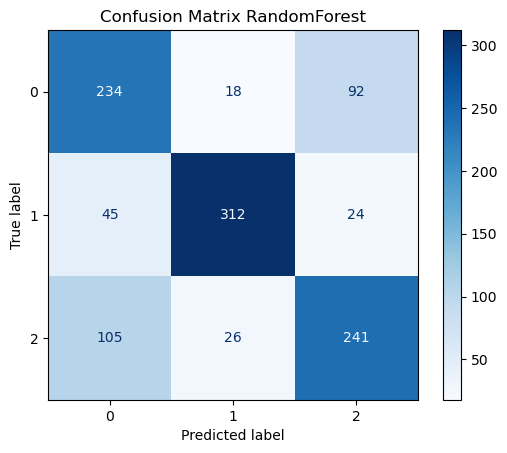

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, noise_types, test_size=0.7, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix RandomForest')
plt.show()


Accuracy: 0.6955332725615314
Confusion Matrix:
 [[239  26  79]
 [ 57 304  20]
 [112  40 220]]


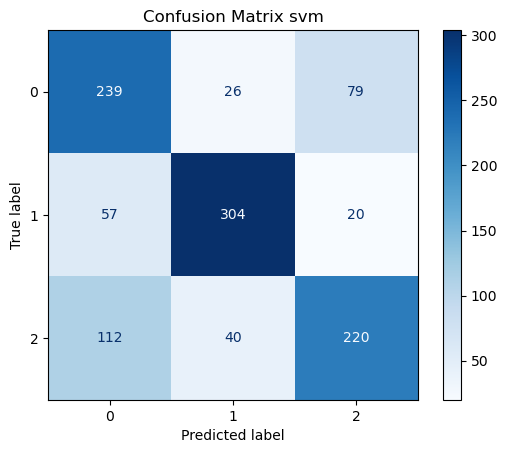

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(features, noise_types, test_size=0.7, random_state=42)

# آموزش مدل
model = SVC()  # Using Support Vector Classifier
model.fit(X_train, y_train)

# ارزیابی مدل
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# محاسبه و نمایش ماتریس سردرگمی
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# نمایش ماتریس سردرگمی
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix svm')
plt.show()


Accuracy: 0.6444849589790337
Confusion Matrix:
 [[282  37  25]
 [ 63 312   6]
 [196  63 113]]


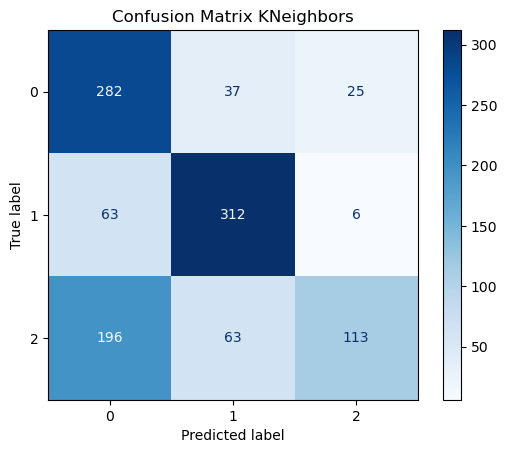

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(features, noise_types, test_size=0.7, random_state=42)
# آموزش مدل
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
model.fit(X_train, y_train)

# ارزیابی مدل
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# محاسبه و نمایش ماتریس سردرگمی
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# نمایش ماتریس سردرگمی
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix KNeighbors')
plt.show()


Accuracy: 0.6034639927073838
Confusion Matrix:
 [[172  56 116]
 [ 55 287  39]
 [115  54 203]]


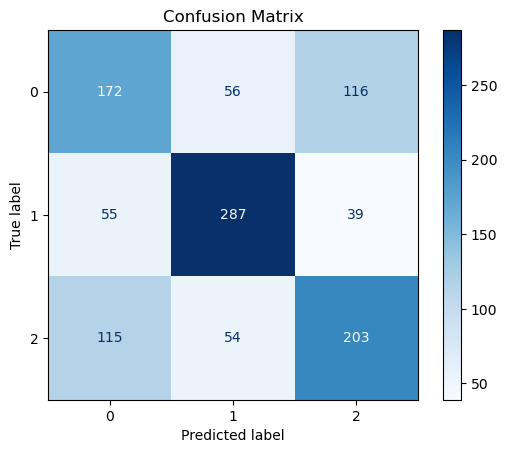

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(features, noise_types, test_size=0.7, random_state=42)
# آموزش مدل
model = DecisionTreeClassifier()  # Using Decision Tree Classifier
model.fit(X_train, y_train)

# ارزیابی مدل
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# محاسبه و نمایش ماتریس سردرگمی
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# نمایش ماتریس سردرگمی
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [94]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the path to your dataset
image_folder = '../data/Noisy'  # Change this to your image folder path
labels_file = '../data/Labels.csv'  # Change this to your labels CSV file path

# Load labels from the CSV file
labels_df = pd.read_csv(labels_file)

# Initialize lists to hold the features and labels
features = []
labels = []

# Load images and their corresponding labels
for index, row in labels_df.iterrows():
    image_name = row['image_name']  # Adjust this based on your CSV column name
    label = row['noise_type']  # Adjust this based on your CSV column name
    img_path = os.path.join(image_folder, image_name)
    
    # Load the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((64, 64))  # Resize to a fixed size
    img_array = np.array(img).flatten()  # Flatten the image to a 1D array
    
    features.append(img_array)
    labels.append(label)

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Identify incorrect predictions
incorrect_mask = y_pred != y_test  # Create a boolean mask for incorrect predictions

# Select the features and labels for incorrect predictions
incorrect_predictions = X_test[incorrect_mask]
incorrect_labels = y_test[incorrect_mask]

# Combine the features and incorrect labels into a DataFrame for better visualization
incorrect_data = pd.DataFrame(incorrect_predictions)
incorrect_data['True Label'] = incorrect_labels
incorrect_data['Predicted Label'] = y_pred[incorrect_mask]




Accuracy: 0.551063829787234


In [95]:
print("Incorrect Predictions:")
print(incorrect_data)

Incorrect Predictions:
       0    1    2    3    4    5    6    7    8    9  ...  4088  4089  4090  \
0    170  183  203  225  244  252  253  247  233  212  ...   144   167   188   
1    214  212  207  200  218  218  217  216  212  205  ...   145    95    94   
2    234  234  232  231  226  226  228  221  229  229  ...   179   175   178   
3    233  235  232  226  219  233  233  234  233  228  ...     9    22    25   
4    215  216  214  215  216  216  215  213  213  211  ...   183   177   180   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
206  167  152  158  160  160  155  163  156  154  158  ...   199   194   199   
207  211  208  210  210  214  215  216  219  211  217  ...   202   215   215   
208  127  138  157  171  219  222  230  240  231  223  ...   163   164   162   
209  181  172  178  197  211  209  193  178  177  192  ...   187   170   165   
210  208  210  210  211  213  214  215  216  218  220  ...   213   211   208   

     4091  4092 